# linear Regression Example and implementation:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path
import sys

In [ ]:
base_dir = Path.cwd().parent 
base_dir = Path(base_dir)
print(f"Base directory: {base_dir}")
from ml_implement.general_utils.data_read import DataReader

In [ ]:

filename = 'realest.csv'
filepath = base_dir/'data'/'Linear_Regression'/'chicago_houseprice'
# reader = DataReader(filepath, filename)
# reader = DataReader(filepath=filepath, filename=filename, split=True, df_want=True, target_column="Price")
reader = DataReader(filepath=filepath, filename=filename, split=True, df_want=True, target_column=None)
res = reader.run() # result.

In [ ]:
import sys
from pathlib import Path
rootpath = Path.cwd().parent
helperpath = rootpath / 'helper'
helperFunpath  = Path(helperpath)
sys.path.insert(0, str(helperpath))

from data_read import DataReader
filepath = helperFunpath / 'data' / 'Linear_Regression' / 'chicago_houseprice'
filename = 'realest.csv'

# Check if the path exists, if not print available paths
if not filepath.exists():
	print(f"Path does not exist: {filepath}")
	print(f"Available directories: {list((helperFunpath / 'data').glob('*'))}")
else:
	data = DataReader(filepath = filepath, filename = filename)
	data = data.read_data()
	print(data.head())


In [ ]:
datafile = r"/home/mrafiku/AI_learning/machine-learning-basics/data/Linear_Rigression/placementdata/placement.csv"
df = pd.read_csv(datafile)
print(df.head())
# print(df.info())
# print(df.describe())

In [ ]:
# CSV files often include:
# Leading/trailing spaces
# Hidden characters
# -  Uppercase/lowercase mismatches
# -  UTF-8 BOM characters
# -  Inconsistent headers
# Even if the DataFrame looks correct, the internal label might be different.

print(df.columns.tolist())
# print(df.columns)
# Fix: normalize column names
df.columns = df.columns.str.strip().str.lower()


In [ ]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package')
plt.title('CGPA vs package')
plt.show()


In [ ]:
df.shape # (n_rows, n_columns)
df.size  # total number of elements in the DataFrame
df.ndim  # number of dimensions (axes) of the DataFrame
print(f"DataFrame Shape: {df.shape} | Size: {df.size} | Dimensions: {df.ndim}")

In [ ]:
# X = df["cgpa"]
# X.shape
# X.ndim
# X = np.array(X).reshape(-1,1)
# # X = X.reshape(-1,1)
# X.shape 

In [ ]:
X = df.iloc[:,0].values
y = df.iloc[:,1].values 
print(f"X shape: {X.shape} | type ox X: {type(X)}| y shape: {y.shape} | type of y: {type(y)}")

if X.ndim == 1:
    X = X.reshape(-1,1)
if y.ndim == 1:
    y = y.reshape(-1,1)
print(f"After Reshaping: X shape: {X.shape}, y shape: {y.shape} ")

- df.describe()
- df.columns.tolist()
- print(f" {X} \n {y}")
- print(f"X shape: {X.shape}, y shape: {y.shape} and \n X type: {type(X)} | y type: {type(y)} ")  
#--> These are the output of the print statement 
- those clearly shows: That shapes of X,y is one D array, so for the Sklearn we need to reshape it to 2D array : for fit and predict methods. 
- X shape: (200,), y shape: (200,) and 
- X type: <class 'numpy.ndarray'> | y type: <class 'numpy.ndarray'>
#--> Reshaping the X to 2D array in th ebelow next cell: ---> 

In [ ]:
# " this is function to fit Linear Regression model and return X_train,X_test,y_train, y_test,model"

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

def LR_modelfit_predict_Result(X, y,test_size = None):
    """
    Docstring for fit_LR_model_predict_Result is return result: X_train,X_test,y_train, y_test,model
    :param X: X is numpy array of shape (n_samples, n_features)
    :param y: y is numpy array of shape (n_samples, )
    :param test_size: test_size is None,bydefault is 0.2 if None, 0 if 0, else float value between 0 and 1
    :return: X_train,X_test,y_train, y_test,model
    """
    if X.ndim == 1:
        X = X.reshape(-1,1)
    if y.ndim == 1:
        y = y.reshape(-1,1)
    if test_size == 0:
        print("using all data for training as test_size is 0")
        X_train, y_train = X,y
    if test_size is None:
        test_size = 0.2
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    if test_size is not None and test_size !=0:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape} , y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")
    model = LinearRegression()
    model.fit(X_train, y_train)
    # y_pred = model.predict(X_test)
    return X_train,X_test,y_train, y_test,model
    # print(f"input_CGPA: {X_test[0,0]}, PREDICTED_PACKAGE: {y_pred[0,0]} and ACTUAL PACKAGE: {y_test[0,0]}")

In [ ]:
# this a module to import the metric of the linear regression from scratch
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
X_train,X_test,y_train, y_test,model = LR_modelfit_predict_Result(X, y,test_size=0.2)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)
print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R2_score: {r2}")

In [ ]:
# sklearn.datasets..make_regression() --> used to generate the regression datasets provided by the scikit-learn.

from sklearn.datasets import make_regression
from mpl_toolkits.mplot3d import Axes3D

X,y =  make_regression(n_samples = 100,n_features=2,n_informative=2,n_targets=1,noise=0.1, random_state=42)
# print(f"{X} \n {y}")
x1 = X[:,0]
x2 = X[:,1]
# plt.scatter(x1,x2,y)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x1, x2, y, c=y, cmap='viridis', s=40, alpha=0.8)



ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title('3D scatter: x1, x2 vs y')
fig.colorbar(sc, ax=ax, shrink=0.5, label='y')
plt.show()

In [ ]:
# write code for linear regresssion model from the basics without using sklearn library.

In [ ]:
class LinearRegressionMine():
    def __init__(self):

        pass
    def fit(self,X,y):
        n = X.shape[0]  # number of training examples.
        d = X.shape[1]  # numbers of features
        
        X = np.hstack((np.ones((n,1)),X))  # adding bias term to the feature matrix. 
        A = (X.T)@X
        A_inv = np.linalg.inv(A)
        B = (X.T)@y
        Theta = A_inv @ B   # parameters of the model.
        self.theta = Theta
        return Theta
    
    def predict(self,X):
        n = X.shape[0]
        X = np.hstack((np.ones((n,1)),X))  # adding bias term to the feature matrix. 
        y_pred = X @ self.theta
        self.y_pred = y_pred
        return y_pred
    
    def MAE(self,y_true,y_pred):
        n_test = y_true.shape[0]
        mae = np.abs(np.sum(y_true - y_pred))/n_test
        return mae
    
    def MSE(self,y_true,y_pred):
        n_test = y_true.shape[0]
        mse = np.sum((y_true - y_pred)**2)/n_test
        return mse
    def RMSE(self,y_true,y_pred):
        mse = self.MSE(y_true,y_pred)
        rmse = np.sqrt(mse)
        return rmse
    def R2_score(self,y_true,y_pred):
        ss_total = np.sum((y_true - np.mean(y_true))**2)
        ss_residual = np.sum((y_true - y_pred)**2)
        r2 = 1 - (ss_residual/ss_total)
        return r2




In [ ]:
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test= train_test_split(X,y,test_size =0.2,random_state = 42)
# print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape} , y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")
mlr = LinearRegressionMine()
mlr.fit(X_train,y_train)
y1_pred = mlr.predict(X_test)


In [ ]:
print(f"input_CGPA: {X_test[0,0]}, PREDICTED_PACKAGE: {y1_pred[0,0]} and ACTUAL PACKAGE: {y_test[0,0]}")
# input_CGPA: 6.63, PREDICTED_PACKAGE: 2.7803134765595168 and ACTUAL PACKAGE: 2.79
ame = mlr.MAE(y_test,y1_pred)
mse = mlr.MSE(y_test,y1_pred)
rmse = mlr.RMSE(y_test,y1_pred)
r2 = mlr.R2_score(y_test,y1_pred)   
print(f"AME: {ame}, MSE: {mse}, RMSE: {rmse}, R2_score: {r2}")
# MAE: 0.23150985393278373, MSE: 0.08417638361329656, RMSE: 0.2901316659954521, R2_score: 0.7730984312051673

# here we can see the results are comparable with the sklearn library.

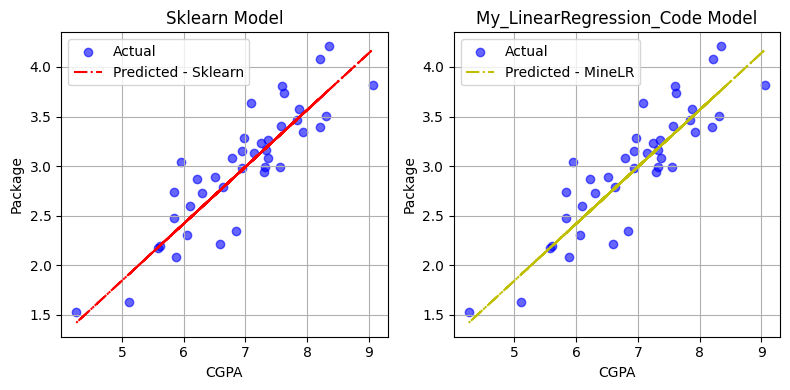

In [ ]:
import matplotlib.pyplot as plt

# 1. Initialize the figure and axes
fig, ax = plt.subplots(1, 2, figsize=(8, 4))  # 1 row, 2 columns

# --- FIRST SUBPLOT (Index 0) ---
ax[0].scatter(X_test, y_test, color='blue', label='Actual', alpha=0.6)
ax[0].plot(X_test, y_pred, '-.r', label='Predicted - Sklearn')
ax[0].set_xlabel('CGPA')
ax[0].set_ylabel('Package')
ax[0].set_title('Sklearn Model')
ax[0].grid(True)  # Use ax[0].grid() instead of plt.grid()
ax[0].legend()

# --- SECOND SUBPLOT (Index 1) ---
ax[1].scatter(X_test, y_test, color='blue', label='Actual', alpha=0.6)
ax[1].plot(X_test, y1_pred, '-.y', label='Predicted - MineLR')
ax[1].set_xlabel('CGPA')
ax[1].set_ylabel('Package')
ax[1].set_title('My_LinearRegression_Code Model')
ax[1].grid(True)  # Use ax[1].grid() instead of plt.grid()
ax[1].legend()

# Final adjustments
plt.tight_layout() 
plt.show()


In [ ]:
# Gradient Descent: 
# bn+1  = bn - α * ∇J / @ b = bn 

In [ ]:
from sklearn.datasets import make_regression
X,y  = make_regression(n_samples=7, n_features=1, n_targets=1, noise=50, random_state=42)
# from sklearn.Linear_model import LinearRegression

model  = LinearRegression()
model.fit(X,y)
y_pred = model.predict(X)

import matplotlib.pyplot as plt
import numpy as np
plt.scatter(X,y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', label='Linear Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()

In [ ]:
y.shape

In [ ]:
from pathlib import Path
# model.intercept_  # b0  --> bias term
model.coef_       # b1  --> weight term
m = model.coef_[0]  # slope (m)
print(f"Slope (m): {m} and shape : {model.coef_.shape} ")
 
learning_rate = 0.01  # learning rate
n = X.shape[0]  # number of training examples
b = 0
epochs = 25
        
plt.figure(figsize=(8,5.6))
for  i in range(1,epochs+1):
    gradient_m = -2*(np.sum(y) -m*np.sum(X) - n*b)
    stepsize = learning_rate*gradient_m # step size = LearningRate * gradient
    b = b - stepsize  # gradient decent formula.

    ygds = m*X + b
    # Only label the first and last epoch to keep legend clean
    label = f'Epoch {i}' if i == 1 or i == epochs or  i%5 == 0  else None
    plt.plot(X,ygds,'-.',label=label,alpha=0.2)

plt.plot(X, y_pred,color='red',label='Linear Regression fit')
plt.scatter(X,y, color='blue', label='Data Points')
plt.grid()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Gradient Descent Progression and Linear Regression (Red Line)')
plt.legend()


# plt.show()


main_path  = Path("/home/mrafiku/AI_learning/machine-learning-basics")
results_path = main_path / "results"
result_Linear_Regression_gdsc = results_path / "Linear_Regression"/"usingGdsc"
result_Linear_Regression_gdsc.mkdir(parents=True, exist_ok=True)
filename = f"gdsc_progression_epochs_{epochs}_ALL.png"
plt.savefig(result_Linear_Regression_gdsc / filename)
plt.show()
plt.close(20)


# The Below cell code is to convert the png images to .gif image.

from PIL import Image - # pip install pillow
import os
from pathlib import Path

# 1. Define paths
image_path = Path("/home/mrafiku/AI_learning/machine-learning-basics/results/Linear_Regression/usingGdsc")
gif_path = image_path / "gdsc_animation.gif"

# 2. Grab all images and sort them numerically
# It's important to sort them so the animation follows the epoch order
images = sorted(list(image_path.glob("gdsc_progression_epochs_*.png")), 
                key=lambda x: int(x.stem.split('_')[-1]))

# 3. Load images into a list
frames = [Image.open(img) for img in images]

# 4. Save as GIF
if frames:
    frames[0].save(
        gif_path,
        format="GIF",
        append_images=frames[1:],
        save_all=True,
        duration=500, # 500ms per frame (half a second)
        loop=0        # 0 means it loops forever
    )
    print(f"GIF saved successfully at: {gif_path}")
else:
    print("No images found to create GIF.")

## This below is Mine code for the 'Batch gradient descent algorithm'.
## This is compared with the SKLEARN Linear Regression and Graph of both is also compared.
## carefull about the learning rate (alpha):
-1 alpha should not be much less.

-2 alpha should not be too high -> otherwise Never converge.

-3 alpha should be appropraite. If data is normalize between [-1,1] then can choose alpha = 0.01 

In [ ]:
class Mine_GradientDescent_LinaerRgression:
    def __init__(self,learning_rate = None,epochs =None,initial_b =None, initial_w =None):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.b = initial_b
        self.w = initial_w
        self.J_w_b_history = {"w":[], "b":[], "J_cost":[]}
        # self.J_cost_hsitory = []

    def fit(self,X,y):
        X = np.asarray(X, dtype=float)
        y = np.asarray(y, dtype=float)
        X = X.reshape(-1, X.shape[1])  # Ensure X is 2D
        m,d = X.shape
        if self.w is None:
            self.w = np.zeros((d,1))
        # self.w = np.zeros((d,1))  # initializing weights to zero vector of shape (d,1)
        # print(f"d : {d} - {self.w.shape} initial w: {self.w.flatten()} and shape of w: {self.w.shape} and initial b: {self.b}")

        for epoch in range(self.epochs):
            
            unitV = np.ones((m,1))    
            y = y.reshape(-1,1)
            # print(f" shape of the unitV: {unitV.shape} and Transpose of unitV: {(unitV.T).shape}")
            
            y_hat = X@self.w + self.b*unitV  # prediction using the hypothesis, written in matrix form so, 
            # it can work for single features as well as muultiple features. and cover the m no of training example as well as for single traing example.

            error = y_hat - y   # this term is common in both the gradient of b,w.[Xw + b*1 - y]-> [X(mxd)W(dx1) + b*1(1Xm unit vector) - y(mx1))]
            # self.J_cost_hsitory["J_cost"].append(np.mean(error**2))  # cost function history for each epoch.
            # grad_b = np.mean(error) or 1/m*unitV.T @ error or 1/m*np.dot(unitV.T,error)
            # grad_b = 1/m*unitV.T@ (X@self.w + self.b*unitV - y)
            # grad_b = np.mean(error)
            # grad_b = 1/m*np.dot(unitV.T,error)
            grad_b =  1/m*unitV.T @ error
            self.b = self.b - self.learning_rate*grad_b

            # grad_w = 1/m*X.T @ (X@self.w +self.b*unitV - y)
            grad_w = 1/m*X.T@ error
            self.w = self.w - self.learning_rate*grad_w
            # print(f"Epoch: {epoch+1}/{self.epochs},coefficient (w): {self.w.flatten()} intercept_b: {self.b} ")
            self.J_w_b_history["w"].append(self.w.flatten())
            self.J_w_b_history["b"].append(self.b)
            self.J_w_b_history["J_cost"].append(np.mean(error**2))
            
        return self.b,self.w,self.J_w_b_history 
    
    def predict(self,X_test):
        X_test = np.asarray(X_test, dtype=float)
        unitV1 = np.ones((X_test.shape[0],1))
        y_pred = unitV1*self.b + X_test@self.w
        
        return y_pred
        

In [ ]:
# X_test,y_test
print(f"X_test:{X_test.shape} type: {type(X_test)} and y_test : {y_test.shape}")
print(f"X_train:{X_train.shape} and y_train : {y_train.shape}")

In [ ]:
epochs = 1000
MyGd = Mine_GradientDescent_LinaerRgression(learning_rate=0.001,epochs=epochs,initial_b=0, initial_w = None) 
MyGd.fit(X_test,y_test)
intercept = MyGd.b
coefficient = MyGd.w
print(f"Coefficient (w): {coefficient.flatten()} and Intercept (b): {intercept} ")

w = MyGd.J_w_b_history["w"]
b = MyGd.J_w_b_history["b"]
j_cost = MyGd.J_w_b_history["J_cost"]

In [ ]:
w_flat = np.array(MyGd.J_w_b_history["w"]).flatten()
b_flat = np.array(MyGd.J_w_b_history["b"]).flatten()

import numpy as np
import matplotlib.pyplot as plt

# 1. Create a "Map" (Grid) around your path
# Find the min/max of your history to set the plot boundaries
w_range = np.linspace(min(w_flat)-50, max(w_flat)+50, 100)
b_range = np.linspace(min(b_flat)-50, max(b_flat)+50, 100)
W, B = np.meshgrid(w_range, b_range)

# 2. Calculate the Cost for the ENTIRE grid
# You need your actual compute_cost function here
def compute_cost(x, y, w, b):
    m = len(x)
    return (1/(2*m)) * np.sum((w * x + b - y)**2)

# Vectorize the cost calculation for the grid
Z = np.zeros(W.shape)
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        Z[i,j] = compute_cost(X_train, y_train, W[i,j], B[i,j])

# 3. Plot the "Full Bowl" (Concentric Circles)
plt.figure(figsize=(8, 6))
# Using plt.contour (lines) and plt.contourf (filled colors)
plt.contourf(W, B, Z, levels=50, cmap='viridis', alpha=0.8)
plt.contour(W, B, Z, levels=20, colors='white', alpha=0.2) # Adding line rings

# 4. Overlay YOUR Gradient Descent path on the map
plt.plot(w_flat, b_flat, color='magenta', marker='.', label='Your GD Path')
plt.scatter(w_flat[-1], b_flat[-1], color='red', marker='x', s=100, zorder=5)

plt.xlabel('w')
plt.ylabel('b')
plt.title('Andrew Ng Style Contour Plot')
plt.colorbar(label='Cost J(w,b)')
plt.legend()
plt.show()

In [ ]:

# MyGd = Mine_GradientDescent_LinaerRgression(learning_rate=0.1,epochs=25,initial_b=0, initial_w = np.zeros((X.shape[1],1)) )


j_cost = MyGd.J_w_b_history["J_cost"]
# iterations = range(1,epochs+1)
iterations = range(1,len(j_cost)+1)
fig,ax =  plt.subplot(1,2)
ax[0].plot(iterations, j_cost, '-.g')
ax[0].set_xlabel('Iterations')
ax[0].set_ylabel('Cost J(b,w)')
ax[0].set_title('Cost Function History during Gradient Descent')
ax[0].grid()







plt.show()


model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(f"SKLEARN : --> model.coef_: {model.coef_} and model.intercept_: {model.intercept_}")
y_pred_gd = MyGd.predict(X_test)

fig,ax = plt.subplots(1,2, figsize=(11,6.3))
ax[0].plot(X_test,y_pred_gd,'-.y',label='Predicted - MyGdsc')
ax[0].scatter(X_test,y_test, color='blue', label='Actual', alpha=0.6)
ax[0].set_xlabel('CGPA')
ax[0].set_ylabel('Package')
ax[0].set_title('My Gradient Descent Linear Regression')
ax[0].grid()
ax[1].plot(X_test,y_pred,'-.r',label='Predicted - Sklearn')
ax[1].scatter(X_test,y_test, color='blue', label='Actual', alpha=0.6)
ax[1].set_xlabel('CGPA')
ax[1].set_ylabel('Package')
ax[1].set_title('My sklearn Regression')
ax[1].grid()
plt.legend()
plt.show()

# Coefficient (w): [0.54925495] and Intercept (b): -0.8101326877470646 
# SKLEARN : --> model.coef_: [[0.57425647]] and model.intercept_: [-1.02700694]